<a href="https://colab.research.google.com/github/MusaibSyd/Deeplearning/blob/main/CNN_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-11-02 13:07:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.33.208, 142.251.45.112, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.33.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   148MB/s    in 0.7s    

2022-11-02 13:07:48 (148 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
import os

In [5]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


Visulaize Images

In [6]:
num_steak_images = len(os.listdir("pizza_steak/train/steak"))

In [7]:
num_steak_images

750

In [8]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.image import imread

In [94]:
def view_random_image (dir, clas):
  folder = dir+clas
  random_image = random.sample(os.listdir(folder), 1)
  img = imread(folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(clas)

  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


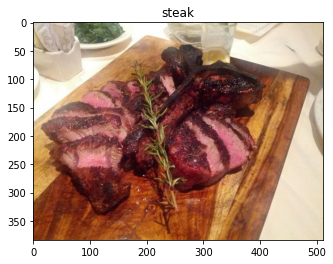

In [95]:
img = view_random_image(dir="pizza_steak/train/", clas="steak")

In [ ]:
dim1 = []
dim2 = []

for image_file in os.listdir('/content/pizza_steak/train/steak'):
  img = imread('/content/pizza_steak/train/steak/'+image_file)
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)


In [ ]:
os.listdir('/content/pizza_steak/train/steak')

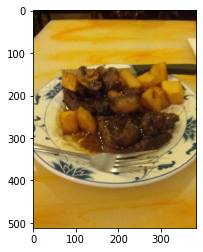

In [19]:
steak_img = '/content/pizza_steak/train/steak/'+'3606642.jpg'
plt.imshow(imread(steak_img))


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
image_gen = ImageDataGenerator(rescale=1./255)

In [40]:
train_path = '/content/pizza_steak/train/'
test_path =  '/content/pizza_steak/test/'

In [41]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),strides=(1,1),padding="valid",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),strides=(1,1),padding="valid",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),strides=(1,1),padding="valid",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 64)      

In [45]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [46]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='binary',
                                                shuffle=True)

Found 1500 images belonging to 2 classes.


In [47]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='binary',
                                                shuffle=True)

Found 500 images belonging to 2 classes.


In [48]:
train_image_gen.class_indices

{'pizza': 0, 'steak': 1}

In [49]:
results = model.fit_generator(train_image_gen,
                              epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
47/47 [==============================] - 137s 3s/step - loss: 0.7171 - accuracy: 0.6413 - val_loss: 0.4829 - val_accuracy: 0.7880
Epoch 2/20
47/47 [==============================] - 134s 3s/step - loss: 0.4789 - accuracy: 0.7813 - val_loss: 0.4286 - val_accuracy: 0.8060
Epoch 3/20
47/47 [==============================] - 134s 3s/step - loss: 0.4438 - accuracy: 0.8000 - val_loss: 0.3938 - val_accuracy: 0.8480
Epoch 4/20
47/47 [==============================] - 133s 3s/step - loss: 0.3813 - accuracy: 0.8340 - val_loss: 0.3101 - val_accuracy: 0.8900
Epoch 5/20
47/47 [==============================] - 136s 3s/step - loss: 0.3465 - accuracy: 0.8513 - val_loss: 0.2688 - val_accuracy: 0.8820
Epoch 6/20
47/47 [==============================] - 132s 3s/step - loss: 0.3121 - accuracy: 0.8680 - val_loss: 0.3292 - val_accuracy: 0.8800
Epoch 7/20
47/47 [==============================] - 134s 3s/step - loss: 0.2838 - accuracy: 0.8793 - val_loss: 0.2734 - val_accuracy: 0.8880


In [50]:
losses = pd.DataFrame(model.history.history)

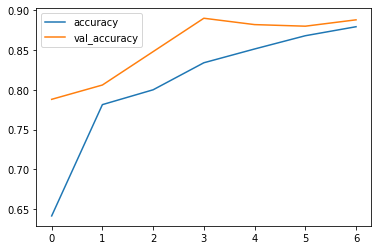

In [51]:
losses[['accuracy', 'val_accuracy']].plot()

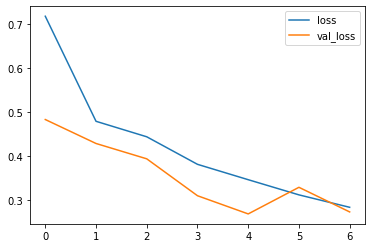

In [52]:
losses[['loss', 'val_loss']].plot()

In [58]:
def plot_losses(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

# plot loss

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

# plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

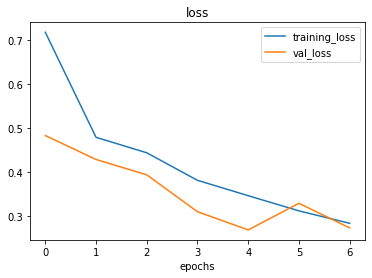

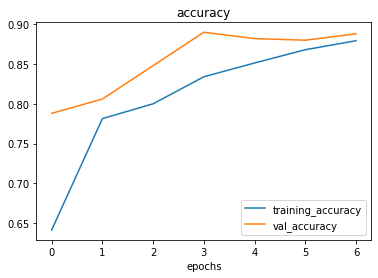

In [59]:
plot_losses(results)